In [1]:
from torchvision import transforms

In [2]:
from data_utils import mean, std, load_dataset, load_batch, getting_total_batch_sizes, getting_classes_names, to_dict, iterate_dataloader
from training_utils import train_model, evaluate_model, show_predictions, make_grid_for_plotting, imshow

In [3]:
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

In [4]:
test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

In [5]:
# https://www.kaggle.com/c/dogs-vs-cats
# https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a
train_dir = '../datasets/cats_or_dogs/train'
test_dir = '../datasets/cats_or_dogs/test'
batch_size = 8
num_workers = 4

In [6]:
train_data = load_dataset(root = train_dir, transform = train_transform)
train_loader = load_batch(train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)

In [7]:
train_data

Dataset ImageFolder
    Number of datapoints: 2002
    Root location: ../datasets/cats_or_dogs/train
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [8]:
test_data = load_dataset(root=test_dir, transform=test_transform)
test_loader = load_batch(test_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)

In [9]:
class_names = getting_classes_names(train_data)
print(class_names)
total_batch_sizes = getting_total_batch_sizes(train_loader, test_loader)
print(total_batch_sizes)
dataloaders = to_dict(train_loader, test_loader)

['cats', 'dogs']
{'train': 251, 'test': 127}
new


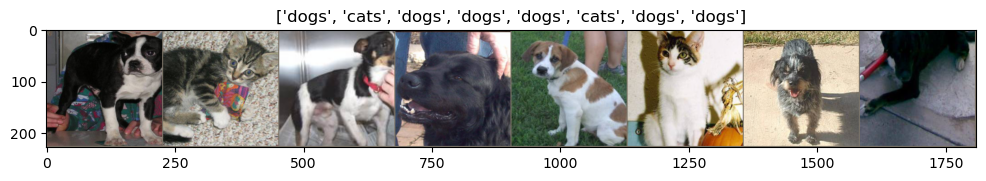

In [10]:
inputs, classes = iterate_dataloader(dataloaders['train'])
out = make_grid_for_plotting(inputs)
imshow(out, title=[class_names[x] for x in classes])

## Load pretrained VGG model

In [11]:
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

from torchvision import models

In [12]:
model = models.vgg16(pretrained=True)
model

C:\Users\joseg\miniconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\joseg\miniconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [13]:
# number of in_features
num_ftrs = model.classifier[6].in_features
num_ftrs

4096

In [14]:
model.classifier[6].out_features

1000

In [15]:
# Freeze all layers of the model, so we use the same model weights as the pretrained model
# Parameters will not be updated because no gradients are calculated
for param in model.parameters():
    param.requires_grad = False

In [16]:
# The most important line is as follows:
# The last layer's weights get updated
model.classifier[6] = nn.Linear(num_ftrs, 2)
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [17]:
# define a loss function
criterion        = nn.CrossEntropyLoss()
# define optimizer
optimizer_ft     = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# define learning rate scheduler
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=5, gamma=0.1)

In [18]:
model = train_model(model, criterion, optimizer_ft, exp_lr_scheduler, dataloaders, 
                    total_batch_sizes, batch_size, num_epochs=5)

Epoch 0/4
----------


C:\Users\joseg\miniconda3\Lib\site-packages\torch\optim\lr_scheduler.py:216: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


train Loss: 1.3859 Acc: 0.9198
test Loss: 0.3662 Acc: 0.9774
Epoch 1/4
----------
train Loss: 1.1398 Acc: 0.9392
test Loss: 0.3280 Acc: 0.9823
Epoch 2/4
----------
train Loss: 1.1473 Acc: 0.9343
test Loss: 0.3653 Acc: 0.9852
Epoch 3/4
----------
train Loss: 1.1697 Acc: 0.9402
test Loss: 0.3363 Acc: 0.9833
Epoch 4/4
----------
train Loss: 1.1669 Acc: 0.9402
test Loss: 0.3335 Acc: 0.9813
Training complete
Best val Acc: 0.985236


In [19]:
evaluate_model(model, dataloaders['test'])

Accuracy of the model on the test images: 98.91304347826087%


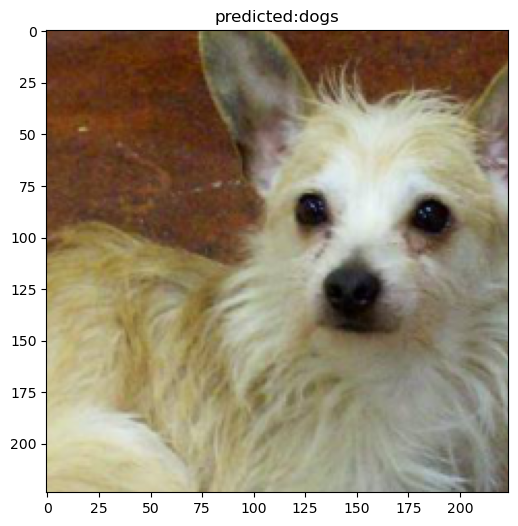

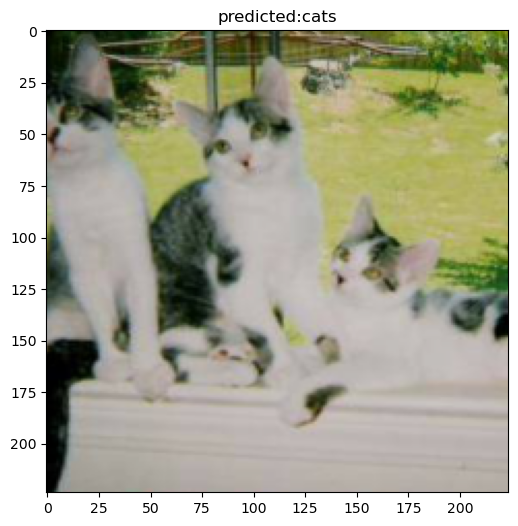

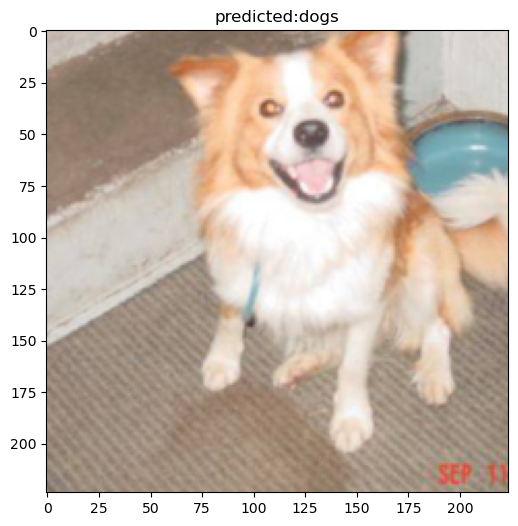

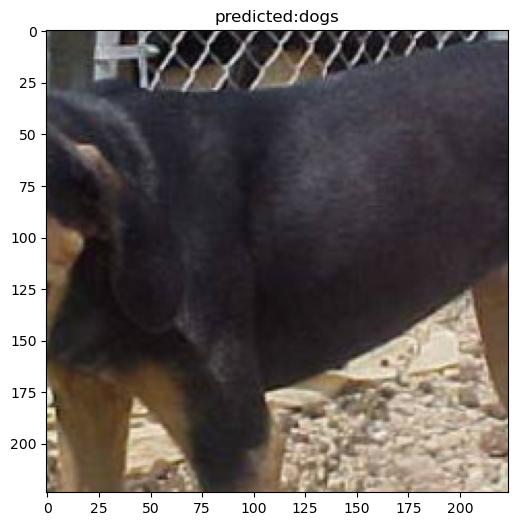

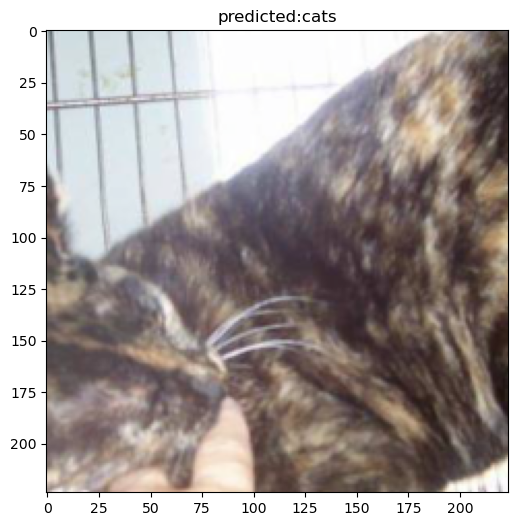

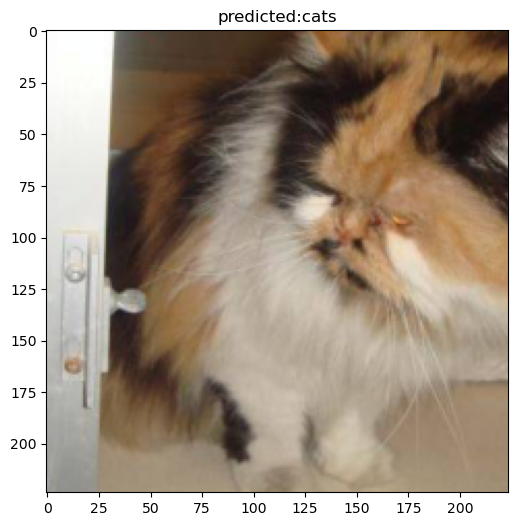

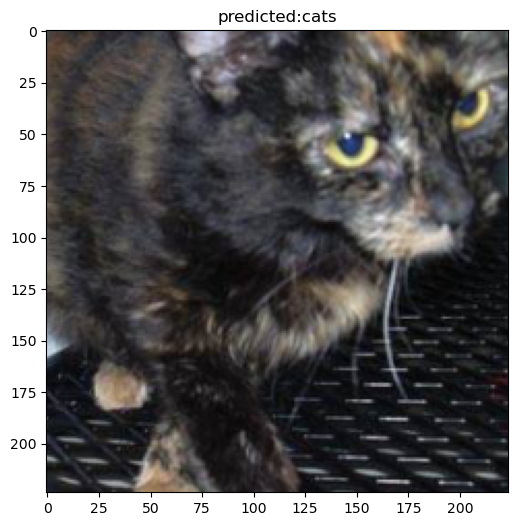

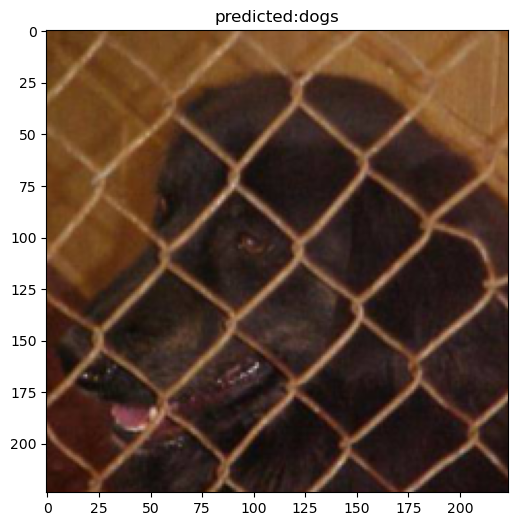

In [20]:
show_predictions(model, dataloaders['test'], class_names)